In [4]:
import os
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/Diabetes_DA_project/jupyter_notebooks'

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [6]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/Diabetes_DA_project'

In [7]:
DestinationFolder = "dataset/cleaned"

In [8]:
# Importing the Pandas library
import pandas as pd

# Loading the dataset
df = pd.read_csv(f'{DestinationFolder}/datacleanup1.csv')

# Displaying the first few rows of the dataset
df.head()

,Unnamed: 0,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,92509,Female,61.0,1,1,ever,32.36,5.8,130,0
1,1,99094,Male,44.0,0,0,not current,30.49,3.5,130,0
2,2,78961,Male,23.0,0,0,never,34.55,6.1,90,0
3,3,13302,Male,68.0,1,1,current,27.32,8.8,155,1
4,4,67956,Female,24.0,0,0,former,21.63,6.1,126,0


In [9]:
# Identify duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Unnamed: 0, index, gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes]
Index: []


In [10]:
# Count the total number of rows
row_count = df.shape[0] # df.shape[0] returns the number of rows in the DataFrame.
print("Total number of rows:", row_count)

Total number of rows: 10000


In [11]:
#check object types and memory details of the collumn values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   index                10000 non-null  int64  
 2   gender               10000 non-null  object 
 3   age                  10000 non-null  float64
 4   hypertension         10000 non-null  int64  
 5   heart_disease        10000 non-null  int64  
 6   smoking_history      10000 non-null  object 
 7   bmi                  10000 non-null  float64
 8   HbA1c_level          10000 non-null  float64
 9   blood_glucose_level  10000 non-null  int64  
 10  diabetes             10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [12]:
#check if values in dataframe is having null values
df.isnull()
df.isnull().sum()

Unnamed: 0             0
index                  0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
#check the datatypes of collumn values
df.dtypes

Unnamed: 0               int64
index                    int64
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [14]:
#check the gender collumn for unique values
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [15]:
#check the smoking_history collumn for unique values
df['smoking_history'].unique()

array(['ever', 'not current', 'never', 'current', 'former', 'No Info'],
      dtype=object)

In [16]:
#convert object types to categories
for col in df.select_dtypes('object'):
    df[col] = df[col].astype('category')
    print(df[col])


0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
9995      Male
9996    Female
9997      Male
9998      Male
9999      Male
Name: gender, Length: 10000, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']
0              ever
1       not current
2             never
3           current
4            former
           ...     
9995          never
9996          never
9997        No Info
9998        No Info
9999          never
Name: smoking_history, Length: 10000, dtype: category
Categories (6, object): ['No Info', 'current', 'ever', 'former', 'never', 'not current']


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           10000 non-null  int64   
 1   index                10000 non-null  int64   
 2   gender               10000 non-null  category
 3   age                  10000 non-null  float64 
 4   hypertension         10000 non-null  int64   
 5   heart_disease        10000 non-null  int64   
 6   smoking_history      10000 non-null  category
 7   bmi                  10000 non-null  float64 
 8   HbA1c_level          10000 non-null  float64 
 9   blood_glucose_level  10000 non-null  int64   
 10  diabetes             10000 non-null  int64   
dtypes: category(2), float64(3), int64(6)
memory usage: 723.1 KB


In [20]:
#convert age col from float to int
df['AGE'] = df['age'].astype(int)
df['AGE']

0       61
1       44
2       23
3       68
4       24
        ..
9995    67
9996    13
9997    14
9998     2
9999    20
Name: AGE, Length: 10000, dtype: int64

In [25]:
#check if there are any distinct value in AGE cols
(df['AGE'] == df['age']).value_counts()

True     9810
False     190
Name: count, dtype: int64

In [22]:
df['gender'].value_counts()


gender
Female    5892
Male      4107
Other        1
Name: count, dtype: int64

In [26]:
df['smoking_history'].value_counts()

smoking_history
No Info        3594
never          3578
current         920
former          906
not current     615
ever            387
Name: count, dtype: int64

In [27]:
df

,Unnamed: 0,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE
0,0,92509,Female,61.0,1,1,ever,32.36,5.8,130,0,61
1,1,99094,Male,44.0,0,0,not current,30.49,3.5,130,0,44
2,2,78961,Male,23.0,0,0,never,34.55,6.1,90,0,23
3,3,13302,Male,68.0,1,1,current,27.32,8.8,155,1,68
4,4,67956,Female,24.0,0,0,former,21.63,6.1,126,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,6118,Male,67.0,0,0,never,35.95,6.5,160,0,67
9996,9996,61999,Female,13.0,0,0,never,19.66,3.5,155,0,13
9997,9997,46327,Male,14.0,0,0,No Info,18.95,6.0,158,0,14
9998,9998,12414,Male,2.0,0,0,No Info,14.66,6.5,160,0,2


In [30]:
#drop 'Unnamed: 0' column from df
df.drop('Unnamed: 0', axis=1)

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE
0,92509,Female,61.0,1,1,ever,32.36,5.8,130,0,61
1,99094,Male,44.0,0,0,not current,30.49,3.5,130,0,44
2,78961,Male,23.0,0,0,never,34.55,6.1,90,0,23
3,13302,Male,68.0,1,1,current,27.32,8.8,155,1,68
4,67956,Female,24.0,0,0,former,21.63,6.1,126,0,24
...,...,...,...,...,...,...,...,...,...,...,...
9995,6118,Male,67.0,0,0,never,35.95,6.5,160,0,67
9996,61999,Female,13.0,0,0,never,19.66,3.5,155,0,13
9997,46327,Male,14.0,0,0,No Info,18.95,6.0,158,0,14
9998,12414,Male,2.0,0,0,No Info,14.66,6.5,160,0,2


In [39]:
#df = df.reset_index(inplace=True)
df.drop('level_0', axis=1, inplace=True)

In [41]:
df.drop('index', axis=1, inplace=True)

In [43]:
df = df.rename(columns={'Unnamed: 0': 'index'})
print(df)

      index  gender   age  hypertension  heart_disease smoking_history    bmi  \
0         0  Female  61.0             1              1            ever  32.36   
1         1    Male  44.0             0              0     not current  30.49   
2         2    Male  23.0             0              0           never  34.55   
3         3    Male  68.0             1              1         current  27.32   
4         4  Female  24.0             0              0          former  21.63   
...     ...     ...   ...           ...            ...             ...    ...   
9995   9995    Male  67.0             0              0           never  35.95   
9996   9996  Female  13.0             0              0           never  19.66   
9997   9997    Male  14.0             0              0         No Info  18.95   
9998   9998    Male   2.0             0              0         No Info  14.66   
9999   9999    Male  20.0             0              0           never  33.98   

      HbA1c_level  blood_gl

In [44]:
df

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE
0,0,Female,61.0,1,1,ever,32.36,5.8,130,0,61
1,1,Male,44.0,0,0,not current,30.49,3.5,130,0,44
2,2,Male,23.0,0,0,never,34.55,6.1,90,0,23
3,3,Male,68.0,1,1,current,27.32,8.8,155,1,68
4,4,Female,24.0,0,0,former,21.63,6.1,126,0,24
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Male,67.0,0,0,never,35.95,6.5,160,0,67
9996,9996,Female,13.0,0,0,never,19.66,3.5,155,0,13
9997,9997,Male,14.0,0,0,No Info,18.95,6.0,158,0,14
9998,9998,Male,2.0,0,0,No Info,14.66,6.5,160,0,2


In [46]:
#Summary statistics
df.describe()
#df.describe(include='all')


,index,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4999.50000,42.032604,0.076800,0.037300,27.345384,5.550100,138.226300,0.086900,42.02290
std,2886.89568,22.522567,0.266287,0.189505,6.689227,1.069774,40.780819,0.281703,22.54031
min,0.00000,0.080000,0.000000,0.000000,10.640000,3.500000,80.000000,0.000000,0.00000
25%,2499.75000,24.000000,0.000000,0.000000,23.610000,4.800000,100.000000,0.000000,24.00000
50%,4999.50000,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,43.00000
75%,7499.25000,60.000000,0.000000,0.000000,29.600000,6.200000,159.000000,0.000000,60.00000
max,9999.00000,80.000000,1.000000,1.000000,87.700000,9.000000,300.000000,1.000000,80.00000


In [119]:
#Handle outliers in bmi, HbAic, blood_glucose_level
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df.dtypes

index                     int64
gender                 category
age                     float64
hypertension              int64
heart_disease             int64
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
AGE                       int64
dtype: object

<Figure size 1000x700 with 0 Axes>

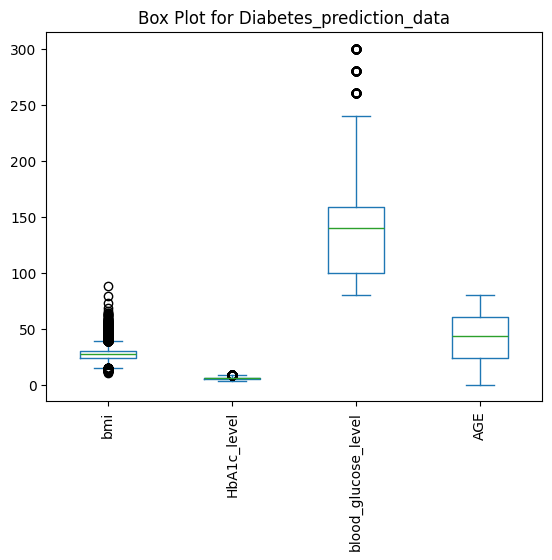

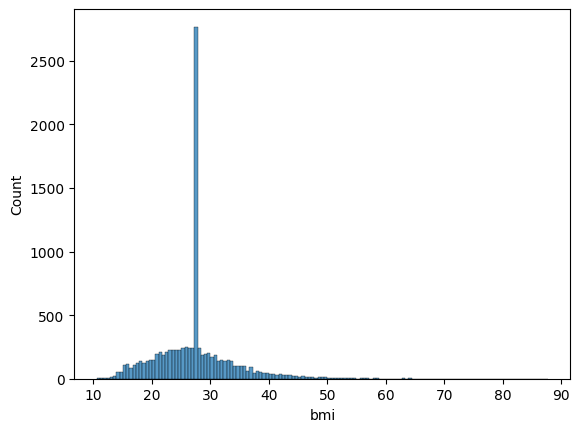

In [122]:
# Create a box plot for 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'AGE' to visualise outliers
plt.figure(figsize=(10, 7))
df.plot(kind='box', y=['bmi', 'HbA1c_level', 'blood_glucose_level', 'AGE'], rot=90)
plt.title('Box Plot for Diabetes_prediction_data')
plt.show()
sns.histplot(df, x=df['bmi'])
plt.show()

In [70]:
# Calculate the mean and standard deviation for the 'blood_glucose_level' column
mean = df['blood_glucose_level'].mean()
std_dev = df['blood_glucose_level'].std()
print("The mean is: ", mean)
print("The standard deviation is: ", std_dev)

The mean is:  138.2263
The standard deviation is:  40.78081896957911


In [71]:
# define outlier thresholds
# Define thresholds
upper_bound = mean + 3 * std_dev
lower_bound = mean - 3 * std_dev

print("The upper bound is: ", upper_bound)
print("The lower bound is: ", lower_bound)
print("The lower bound is negative, so it's not applicable as the amount cannot be negative.")

The upper bound is:  260.5687569087373
The lower bound is:  15.88384309126269
The lower bound is negative, so it's not applicable as the amount cannot be negative.


In [72]:
# Identify outliers in 'blood_glucose_level' based on the standard deviation technique
bldglu_outliers_std_dev = df[(df['blood_glucose_level'] > upper_bound)]
print("Outliers in 'Total Amount' using Standard Deviation Technique:")
print(bldglu_outliers_std_dev)

Outliers in 'Total Amount' using Standard Deviation Technique:
      index  gender   age  hypertension  heart_disease smoking_history    bmi  \
71       71    Male  64.0             1              0          former  33.12   
113     113  Female  57.0             1              0         current  45.13   
148     148  Female  68.0             0              0         No Info  33.88   
175     175    Male  58.0             0              0           never  37.00   
204     204  Female  46.0             0              0           never  36.18   
...     ...     ...   ...           ...            ...             ...    ...   
9260   9260    Male  80.0             1              0           never  27.69   
9295   9295  Female  80.0             0              0           never  28.00   
9386   9386    Male  65.0             0              0          former  25.26   
9649   9649  Female  55.0             0              0           never  41.15   
9676   9676    Male  61.0             0       

In [85]:
df_skewed_bloodglulevel = df.drop(bldglu_outliers_std_dev.index, axis=0)
print(df_skewed_bloodglulevel)

      index  gender   age  hypertension  heart_disease smoking_history    bmi  \
0         0  Female  61.0             1              1            ever  32.36   
1         1    Male  44.0             0              0     not current  30.49   
2         2    Male  23.0             0              0           never  34.55   
3         3    Male  68.0             1              1         current  27.32   
4         4  Female  24.0             0              0          former  21.63   
...     ...     ...   ...           ...            ...             ...    ...   
9995   9995    Male  67.0             0              0           never  35.95   
9996   9996  Female  13.0             0              0           never  19.66   
9997   9997    Male  14.0             0              0         No Info  18.95   
9998   9998    Male   2.0             0              0         No Info  14.66   
9999   9999    Male  20.0             0              0           never  33.98   

      HbA1c_level  blood_gl

In [86]:
df_skewed_bloodglulevel.isna().sum()

index                  0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
AGE                    0
dtype: int64

In [104]:
df_skewed_bloodglulevel_copy = df_skewed_bloodglulevel.copy()
df_skewed_bloodglulevel_copy

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE
0,0,Female,61.0,1,1,ever,32.36,5.8,130,0,61
1,1,Male,44.0,0,0,not current,30.49,3.5,130,0,44
2,2,Male,23.0,0,0,never,34.55,6.1,90,0,23
3,3,Male,68.0,1,1,current,27.32,8.8,155,1,68
4,4,Female,24.0,0,0,former,21.63,6.1,126,0,24
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Male,67.0,0,0,never,35.95,6.5,160,0,67
9996,9996,Female,13.0,0,0,never,19.66,3.5,155,0,13
9997,9997,Male,14.0,0,0,No Info,18.95,6.0,158,0,14
9998,9998,Male,2.0,0,0,No Info,14.66,6.5,160,0,2


In [108]:
#df_skewed_bloodglulevel_copy.index = pd.RangeIndex(len(df_skewed_bloodglulevel_copy.index))
df_skewed_bloodglulevel_copy.drop('index', inplace=True, axis=1)
df_skewed_bloodglulevel_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE
0,Female,61.0,1,1,ever,32.36,5.8,130,0,61
1,Male,44.0,0,0,not current,30.49,3.5,130,0,44
2,Male,23.0,0,0,never,34.55,6.1,90,0,23
3,Male,68.0,1,1,current,27.32,8.8,155,1,68
4,Female,24.0,0,0,former,21.63,6.1,126,0,24
...,...,...,...,...,...,...,...,...,...,...
9844,Male,67.0,0,0,never,35.95,6.5,160,0,67
9845,Female,13.0,0,0,never,19.66,3.5,155,0,13
9846,Male,14.0,0,0,No Info,18.95,6.0,158,0,14
9847,Male,2.0,0,0,No Info,14.66,6.5,160,0,2


In [109]:
# Calculate the mean and standard deviation for the 'bmi' column
mean = df_skewed_bloodglulevel_copy['bmi'].mean()
std_dev = df_skewed_bloodglulevel_copy['bmi'].std()
print("The mean is: ", mean)
print("The standard deviation is: ", std_dev)

The mean is:  27.28216265610722
The standard deviation is:  6.663627068214956


In [110]:
# define outlier thresholds
# Define thresholds
upper_bound_bmi = mean + 4 * std_dev
lower_bound_bmi = mean - 4 * std_dev

print("The upper bound is: ", upper_bound_bmi)
print("The lower bound is: ", lower_bound_bmi)
print("The lower bound is negative, so it's not applicable as the amount cannot be negative.")

The upper bound is:  53.93667092896705
The lower bound is:  0.6276543832473962
The lower bound is negative, so it's not applicable as the amount cannot be negative.


In [112]:
df_skewed_bloodglulevel_copy.reset_index(drop=True, inplace=True)

In [114]:
df_skewed_bloodglulevel_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE
0,Female,61.0,1,1,ever,32.36,5.8,130,0,61
1,Male,44.0,0,0,not current,30.49,3.5,130,0,44
2,Male,23.0,0,0,never,34.55,6.1,90,0,23
3,Male,68.0,1,1,current,27.32,8.8,155,1,68
4,Female,24.0,0,0,former,21.63,6.1,126,0,24
...,...,...,...,...,...,...,...,...,...,...
9844,Male,67.0,0,0,never,35.95,6.5,160,0,67
9845,Female,13.0,0,0,never,19.66,3.5,155,0,13
9846,Male,14.0,0,0,No Info,18.95,6.0,158,0,14
9847,Male,2.0,0,0,No Info,14.66,6.5,160,0,2


In [115]:
# Identify outliers in 'bmi' based on the standard deviation technique
bmi_outliers_std_dev = df_skewed_bloodglulevel_copy[(df_skewed_bloodglulevel_copy['bmi'] > upper_bound_bmi)]
print("Outliers in 'Total Amount' using Standard Deviation Technique:")
print(bmi_outliers_std_dev)

Outliers in 'Total Amount' using Standard Deviation Technique:
      gender   age  hypertension  heart_disease smoking_history    bmi  \
352   Female  31.0             1              0           never  56.94   
581   Female  54.0             0              0         No Info  64.31   
662   Female  58.0             0              0           never  55.62   
971   Female  74.0             0              0           never  57.62   
1006  Female  23.0             0              0     not current  54.69   
1338  Female  68.0             0              0           never  55.17   
1360    Male  53.0             0              0          former  54.87   
1394  Female  25.0             0              0           never  64.27   
1485    Male  42.0             0              0         current  59.27   
1897  Female  47.0             0              0         No Info  54.91   
2043  Female  36.0             0              0           never  79.46   
2299  Female  55.0             0              0  

In [116]:
bmi_outliers_std_dev.count()

gender                 38
age                    38
hypertension           38
heart_disease          38
smoking_history        38
bmi                    38
HbA1c_level            38
blood_glucose_level    38
diabetes               38
AGE                    38
dtype: int64

In [117]:
df_skewed_bloodglulevel_bmi = df_skewed_bloodglulevel_copy.drop(bmi_outliers_std_dev.index, axis=0)
print(df_skewed_bloodglulevel_bmi)

      gender   age  hypertension  heart_disease smoking_history    bmi  \
0     Female  61.0             1              1            ever  32.36   
1       Male  44.0             0              0     not current  30.49   
2       Male  23.0             0              0           never  34.55   
3       Male  68.0             1              1         current  27.32   
4     Female  24.0             0              0          former  21.63   
...      ...   ...           ...            ...             ...    ...   
9844    Male  67.0             0              0           never  35.95   
9845  Female  13.0             0              0           never  19.66   
9846    Male  14.0             0              0         No Info  18.95   
9847    Male   2.0             0              0         No Info  14.66   
9848    Male  20.0             0              0           never  33.98   

      HbA1c_level  blood_glucose_level  diabetes  AGE  
0             5.8                  130         0   61  

In [118]:
# Export the DataFrame to a CSV file
df_skewed_bloodglulevel_bmi.to_csv(f'dataset/cleaned/datacleanup2.csv', index=False)